# US Home Price Prediction

## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp = pd.read_csv("Data/gdp.csv")
immig = pd.read_csv("Data/immigrants.csv")
infl = pd.read_csv("Data/inflation.csv")
mrtg = pd.read_csv("Data/mortgage.csv")
ppl = pd.read_csv("Data/population.csv")
unemp = pd.read_csv("Data/unemployment.csv")
cs = pd.read_csv("Data/cs-shi.csv")
income = pd.read_csv("Data/median-income.csv")
owner = pd.read_csv("Data/homeownership-rate.csv")

## GDP

In [3]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            20 non-null     object 
 1   gdp_billion     20 non-null     float64
 2   gdp_per_capita  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [4]:
gdp['date'] = pd.to_datetime(gdp['date'], format='%d-%m-%Y')

In [5]:
gdp.head()

,date,gdp_billion,gdp_per_capita
0,2003-12-31,11456.44204,39490.2750
1,2004-12-31,12217.19320,41724.6316
2,2005-12-31,13039.19919,44123.4071
3,2006-12-31,13815.58695,46302.0009
4,2007-12-31,14474.22691,48050.2238


In [6]:
gdp['year'] = gdp['date'].dt.year
gdp['month'] = gdp['date'].dt.month
gdp['day'] = gdp['date'].dt.day

In [7]:
gdp.head()

,date,gdp_billion,gdp_per_capita,year,month,day
0,2003-12-31,11456.44204,39490.2750,2003,12,31
1,2004-12-31,12217.19320,41724.6316,2004,12,31
2,2005-12-31,13039.19919,44123.4071,2005,12,31
3,2006-12-31,13815.58695,46302.0009,2006,12,31
4,2007-12-31,14474.22691,48050.2238,2007,12,31


In [8]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            20 non-null     datetime64[ns]
 1   gdp_billion     20 non-null     float64       
 2   gdp_per_capita  20 non-null     float64       
 3   year            20 non-null     int32         
 4   month           20 non-null     int32         
 5   day             20 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(3)
memory usage: 848.0 bytes


In [9]:
gdp.drop(columns=['date', 'day'], inplace=True)

In [10]:
gdp.drop(columns=['month'], inplace=True)

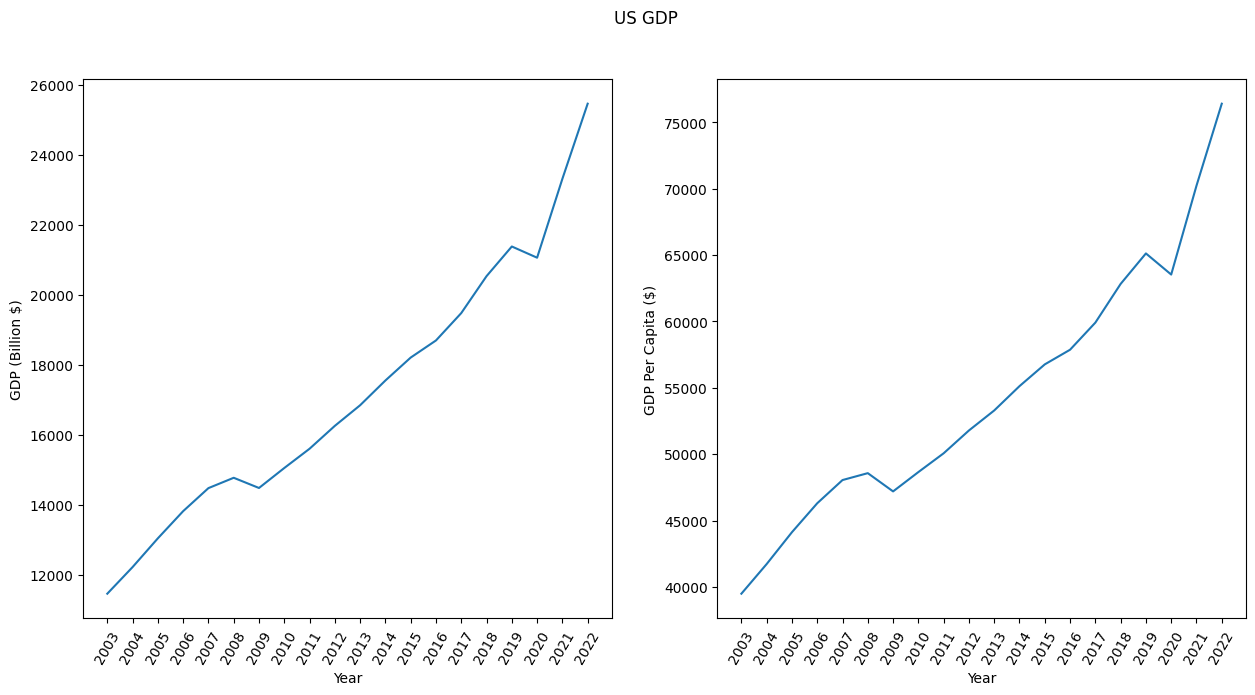

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

fig.suptitle('US GDP')

ax[0].plot(gdp['year'], gdp['gdp_billion'])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP (Billion $)')
ax[0].set_xticks(gdp['year'])
ax[0].tick_params(axis='x', labelrotation=60)

ax[1].plot(gdp['year'], gdp['gdp_per_capita'])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP Per Capita ($)')
ax[1].set_xticks(gdp['year'])
ax[1].tick_params(axis='x', labelrotation=60)

plt.show()

In [12]:
gdp.to_csv('gdp.csv', header=True, index=False)

## Immigrants

In [13]:
immig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   date        20 non-null     int64
 1   immigrants  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [14]:
immig['date'] = pd.to_datetime(immig['date'], format='%Y').dt.year

In [15]:
immig.head()

,date,immigrants
0,2003,31955200
1,2004,32255800
2,2005,33955500
3,2006,34455800
4,2007,35955400


In [16]:
immig.columns = ['year', 'immigrants']

In [17]:
immig['immigrants_million'] = immig['immigrants'] / 1_000_000

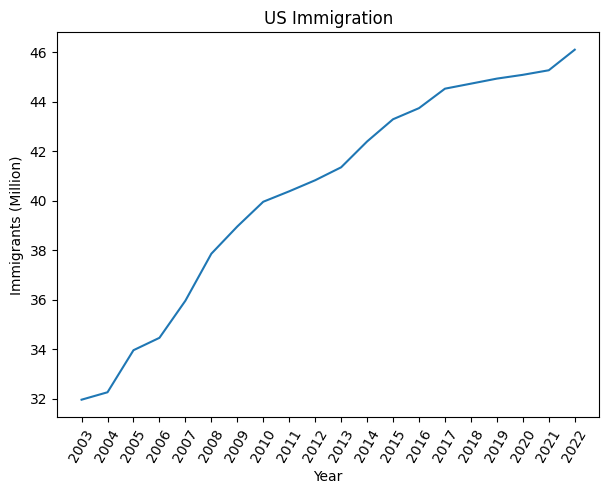

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('US Immigration')

ax.plot(immig['year'], immig['immigrants_million'])
ax.set_xlabel('Year')
ax.set_ylabel('Immigrants (Million)')
ax.set_xticks(immig['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [19]:
immig.drop(columns=['immigrants'], inplace=True)

In [20]:
immig.to_csv('immigration.csv', header=True, index=False)

## Case Shiller

In [21]:
cs.head()

,date,cs
0,01-01-2003,128.461
1,01-02-2003,129.355
2,01-03-2003,130.148
3,01-04-2003,130.884
4,01-05-2003,131.734


In [22]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    240 non-null    object 
 1   cs      240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [23]:
cs['date'] = pd.to_datetime(cs['date'], format='%d-%m-%Y')

In [24]:
cs['year'] = cs['date'].dt.year
cs['month'] = cs['date'].dt.month

In [25]:
cs.head()

,date,cs,year,month
0,2003-01-01,128.461,2003,1
1,2003-02-01,129.355,2003,2
2,2003-03-01,130.148,2003,3
3,2003-04-01,130.884,2003,4
4,2003-05-01,131.734,2003,5


In [26]:
cs.drop(columns=['date'], inplace=True)

In [27]:
cs_yoy = cs[cs['month'] == 12][['cs', 'year']].reset_index(drop=True)

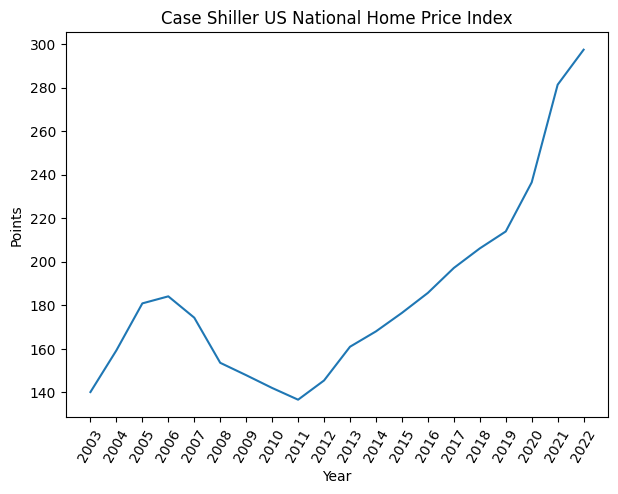

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Case Shiller US National Home Price Index')

ax.plot(cs_yoy['year'], cs_yoy['cs'])
ax.set_xlabel('Year')
ax.set_ylabel('Points')
ax.set_xticks(cs_yoy['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [29]:
cs.to_csv('case-shiller.csv', index=False, header=True)

## Inflation

In [30]:
infl.head()

,date,inf_rate
0,31-12-2003,2.2701
1,31-12-2004,2.6772
2,31-12-2005,3.3927
3,31-12-2006,3.2259
4,31-12-2007,2.8527


In [31]:
infl['date'] = pd.to_datetime(infl['date'], format='%d-%m-%Y')

In [32]:
infl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      20 non-null     datetime64[ns]
 1   inf_rate  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


In [33]:
infl['year'] = infl['date'].dt.year

In [34]:
infl.head()

,date,inf_rate,year
0,2003-12-31,2.2701,2003
1,2004-12-31,2.6772,2004
2,2005-12-31,3.3927,2005
3,2006-12-31,3.2259,2006
4,2007-12-31,2.8527,2007


In [35]:
infl.drop(columns=['date'], inplace=True)

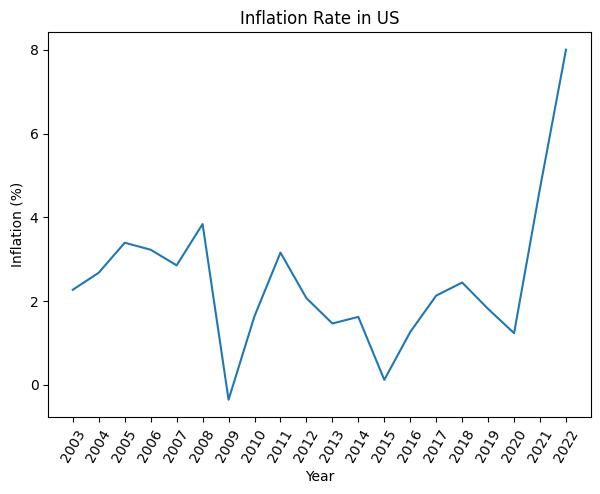

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Inflation Rate in US')

ax.plot(infl['year'], infl['inf_rate'])
ax.set_xlabel('Year')
ax.set_ylabel('Inflation (%)')
ax.set_xticks(infl['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [37]:
infl.to_csv('inflation.csv', header=True, index=False)

## Mortgage

In [38]:
mrtg.head()

,date,mortgage
0,03-01-2003,5.85
1,10-01-2003,5.95
2,17-01-2003,5.97
3,24-01-2003,5.91
4,31-01-2003,5.90


In [39]:
mrtg['date'] = pd.to_datetime(mrtg['date'], format='%d-%m-%Y')
mrtg['year'] = mrtg['date'].dt.year
mrtg['month'] = mrtg['date'].dt.month
mrtg['day'] = mrtg['date'].dt.day

In [40]:
mrtg.drop(columns=['date'], inplace=True)

In [41]:
mrtg_yoy = mrtg.groupby(['year'], as_index=False)['mortgage'].last()

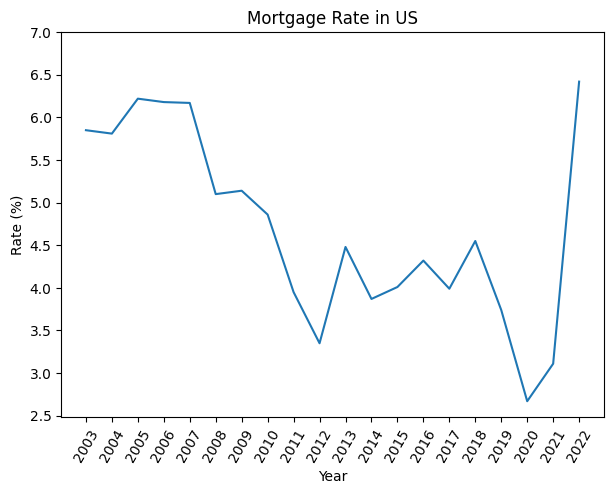

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Mortgage Rate in US')

ax.plot(mrtg_yoy['year'], mrtg_yoy['mortgage'])
ax.set_xlabel('Year')
ax.set_ylabel('Rate (%)')
ax.set_xticks(mrtg_yoy['year'])
ax.set_yticks(np.arange(2.5, 7.01, 0.5))
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [43]:
mrtg.to_csv('mortgage.csv', header=True, index=False)

## Population

In [44]:
ppl.head()

,date,population
0,31-12-2003,291109820
1,31-12-2004,293947885
2,31-12-2005,296842670
3,31-12-2006,299753098
4,31-12-2007,302743399


In [45]:
ppl['date'] = pd.to_datetime(ppl['date'], format='%d-%m-%Y')
ppl['year'] = ppl['date'].dt.year

In [46]:
ppl['ppl_million'] = ppl[' population'] / 1_000_000

In [47]:
ppl.drop(columns=['date', ' population'], inplace=True)

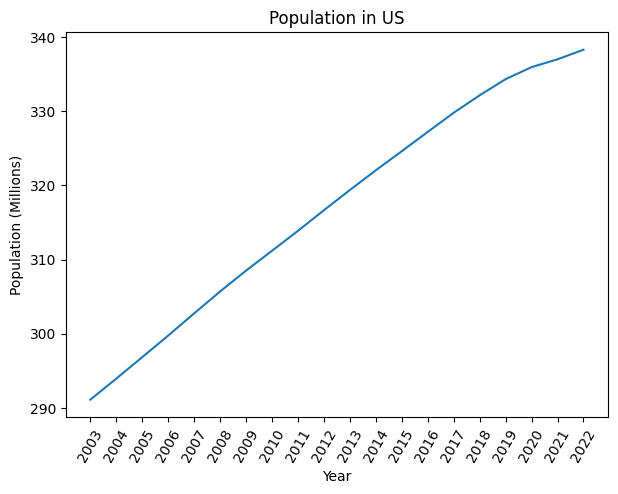

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Population in US')

ax.plot(ppl['year'], ppl['ppl_million'])
ax.set_xlabel('Year')
ax.set_ylabel('Population (Millions)')
ax.set_xticks(ppl['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [49]:
ppl.to_csv('population.csv', header=True, index=False)

## Unemployment

In [50]:
unemp.head()

,date,unemp_rate
0,31-12-2003,5.99
1,31-12-2004,5.53
2,31-12-2005,5.08
3,31-12-2006,4.62
4,31-12-2007,4.62


In [51]:
unemp['date'] = pd.to_datetime(unemp['date'], format='%d-%m-%Y')
unemp['year'] = unemp['date'].dt.year

In [52]:
unemp.drop(columns=['date'], inplace=True)

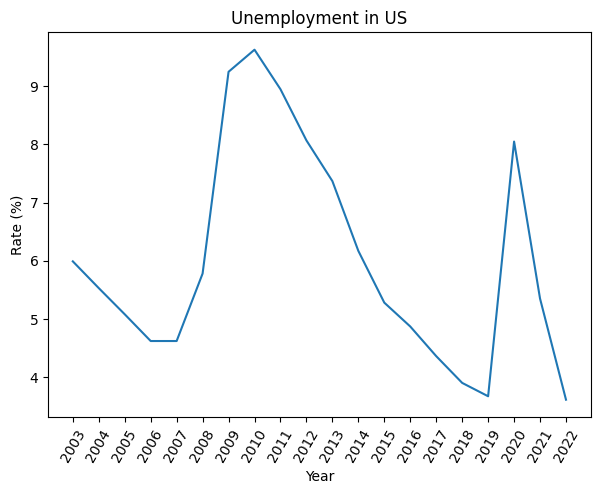

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Unemployment in US')

ax.plot(unemp['year'], unemp['unemp_rate'])
ax.set_xlabel('Year')
ax.set_ylabel('Rate (%)')
ax.set_xticks(unemp['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [54]:
unemp.to_csv('unemployment.csv', header=True, index=False)

## Median Income

In [55]:
income.head()

,date,median_income
0,01-01-2003,65860
1,01-01-2004,65760
2,01-01-2005,66780
3,01-01-2006,67520
4,01-01-2007,68610


In [56]:
income['year'] = pd.to_datetime(income['date']).dt.year

In [57]:
income.drop(columns=['date'], inplace=True)

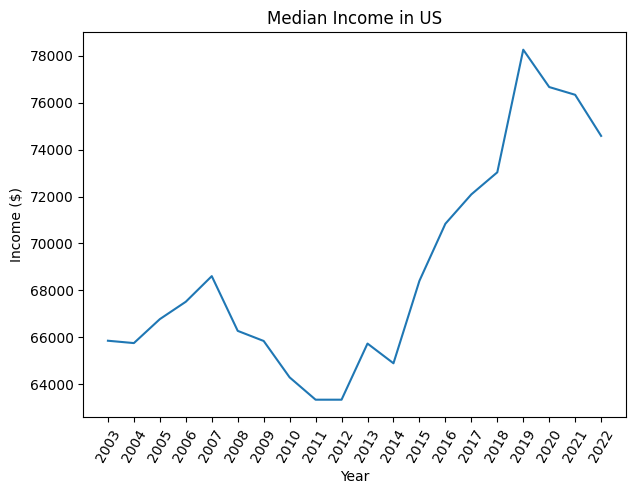

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Median Income in US')

ax.plot(income['year'], income['median_income'])
ax.set_xlabel('Year')
ax.set_ylabel('Income ($)')
ax.set_xticks(income['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [59]:
income.to_csv('median-income.csv', header=True, index=False)

## Homeownership Rate

In [60]:
owner.head()

,date,ownership_rate
0,01-01-2003,68.0
1,01-04-2003,68.0
2,01-07-2003,68.4
3,01-10-2003,68.6
4,01-01-2004,68.6


In [61]:
owner['date'] = pd.to_datetime(owner['date'])

In [62]:
owner['year'] = owner['date'].dt.year
owner['month'] = owner['date'].dt.month
owner['day'] = owner['date'].dt.day

In [63]:
owner.drop(columns=['date'], inplace=True)

In [64]:
owner_yoy = owner.groupby(['year'], as_index=False)['ownership_rate'].last()

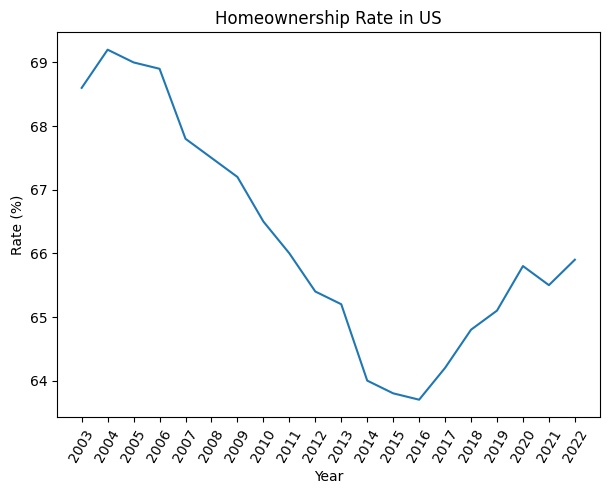

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.set_title('Homeownership Rate in US')

ax.plot(owner_yoy['year'], owner_yoy['ownership_rate'])
ax.set_xlabel('Year')
ax.set_ylabel('Rate (%)')
ax.set_xticks(owner_yoy['year'])
ax.tick_params(axis='x', labelrotation=60)

plt.show()

In [66]:
owner.to_csv('homeownership-rate.csv', header=True, index=False)

## Merging all the Data

Data wrangling is done. Now merging all the data.

In [67]:
df = pd.merge(gdp, immig, on='year', how='inner')\
.merge(infl, on='year', how='inner')\
.merge(mrtg, on='year', how='inner', suffixes=['_avg', '_mrtg'])\
.merge(ppl, on='year', how='inner')\
.merge(unemp, on='year', how='inner')\
.merge(owner, on='year', how='inner', suffixes=['_mrtg', '_owner'])\
.merge(income, on='year', how='inner')\
.merge(cs, on='year', how='inner', suffixes=['_owner', '_cs'])

In [68]:
df.columns

Index(['gdp_billion', 'gdp_per_capita', 'year', 'immigrants_million',
       'inf_rate', 'mortgage', 'month_mrtg', 'day_mrtg', 'ppl_million',
       'unemp_rate', 'ownership_rate', 'month_owner', 'day_owner',
       'median_income', 'cs', 'month'],
      dtype='object')

In [69]:
df.head()

,gdp_billion,gdp_per_capita,year,immigrants_million,inf_rate,mortgage,month_mrtg,day_mrtg,ppl_million,unemp_rate,ownership_rate,month_owner,day_owner,median_income,cs,month
0,11456.44204,39490.275,2003,31.9552,2.2701,5.85,1,3,291.10982,5.99,68.0,1,1,65860,128.461,1
1,11456.44204,39490.275,2003,31.9552,2.2701,5.85,1,3,291.10982,5.99,68.0,1,1,65860,129.355,2
2,11456.44204,39490.275,2003,31.9552,2.2701,5.85,1,3,291.10982,5.99,68.0,1,1,65860,130.148,3
3,11456.44204,39490.275,2003,31.9552,2.2701,5.85,1,3,291.10982,5.99,68.0,1,1,65860,130.884,4
4,11456.44204,39490.275,2003,31.9552,2.2701,5.85,1,3,291.10982,5.99,68.0,1,1,65860,131.734,5


In [70]:
df.columns = ['gdp_billion', 'gdp_per_capita', 'year',
       'immigrants_million', 'inflation_rate', 'mortgage', 'mortgage_month', 'mortgage_day',
        'population_million', 'unemp_rate', 'ownership_rate', 'ownership_month',
       'ownership_day', 'median_income', 'case_shiller_value', 'case_shiller_month']

In [71]:
df = df[['ownership_day', 'mortgage_day', 'ownership_month', 'mortgage_month', 'case_shiller_month', 'year', 
         'gdp_billion', 'gdp_per_capita', 'population_million', 'immigrants_million', 'ownership_rate', 'median_income',
         'inflation_rate', 'mortgage', 'unemp_rate', 'case_shiller_value']]

In [72]:
df.head(15)

,ownership_day,mortgage_day,ownership_month,mortgage_month,case_shiller_month,year,gdp_billion,gdp_per_capita,population_million,immigrants_million,ownership_rate,median_income,inflation_rate,mortgage,unemp_rate,case_shiller_value
0,1,3,1,1,1,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,128.461
1,1,3,1,1,2,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,129.355
2,1,3,1,1,3,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,130.148
3,1,3,1,1,4,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,130.884
4,1,3,1,1,5,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,131.734
5,1,3,1,1,6,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,132.649
6,1,3,1,1,7,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,133.777
7,1,3,1,1,8,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,134.969
8,1,3,1,1,9,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,136.294
9,1,3,1,1,10,2003,11456.44204,39490.275,291.10982,31.9552,68.0,65860,2.2701,5.85,5.99,137.532


In [73]:
df.shape

(50112, 16)

In [74]:
df.to_csv('us-home-data.csv', index=False, header=True)